<a href="https://colab.research.google.com/github/JakeFRCSE/AI_SpeedLearn/blob/main/PyTorch_tutorial(%EB%B0%95%EC%A4%80%ED%98%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.QUICKSTART

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

In [ ]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for X, y in test_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    pred = model(X)
    loss = loss_fn(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")

In [ ]:
epochs = 5
for t in range(epochs):
  print(f"Epoch {t+1}\n-----------------------------------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-----------------------------------------
loss: 2.316091 [   64/60000]
loss: 2.297444 [ 6464/60000]
loss: 2.278203 [12864/60000]
loss: 2.262396 [19264/60000]
loss: 2.252575 [25664/60000]
loss: 2.222386 [32064/60000]
loss: 2.227653 [38464/60000]
loss: 2.195626 [44864/60000]
loss: 2.191660 [51264/60000]
loss: 2.162295 [57664/60000]
Test Error: 
 Accuracy: 45.4%, Avg loss: 2.154009

Epoch 2
-----------------------------------------
loss: 2.170144 [   64/60000]
loss: 2.149366 [ 6464/60000]
loss: 2.097670 [12864/60000]
loss: 2.109663 [19264/60000]
loss: 2.064129 [25664/60000]
loss: 2.003121 [32064/60000]
loss: 2.035475 [38464/60000]
loss: 1.960099 [44864/60000]
loss: 1.968307 [51264/60000]
loss: 1.891318 [57664/60000]
Test Error: 
 Accuracy: 59.3%, Avg loss: 1.888303

Epoch 3
-----------------------------------------
loss: 1.933894 [   64/60000]
loss: 1.883417 [ 6464/60000]
loss: 1.779365 [12864/60000]
loss: 1.811013 [19264/60000]
loss: 1.708981 [25664/60000]
loss: 1.662057 [32064/6

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [ ]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
  x = x.to(device)
  pred = model(x)
  predicted, actual = classes[pred[0].argmax(0)], classes[y]
  print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


#1.TENSOR

In [ ]:
import torch
import numpy as np

In [ ]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [ ]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n{x_ones} \n")

x_rand = torch.rand_like(x_data, dtype = torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7667, 0.1323],
        [0.2576, 0.5078]]) 



In [ ]:
shape = (2, 3, )
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.7982, 0.7979, 0.6019],
        [0.8859, 0.3432, 0.6552]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
tensor = torch.rand(3,4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
if torch.cuda.is_available():
  tensor = tensor.to("cuda")

In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:,0]}")
print(f"Last cilumn: {tensor[...,-1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last cilumn: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim = 1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [ ]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out = y3)

z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out = z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [ ]:
agg= tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [ ]:
print(f"{tensor}\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


#2.DATASET and DATALOADER

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

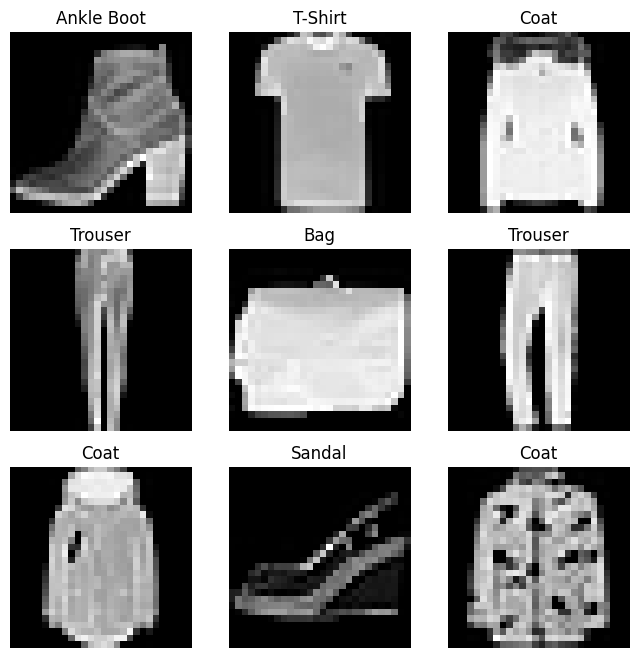

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure =  plt.figure(figsize = (8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size = (1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap = "gray")
plt.show()

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
    self.img_labels = pd.read_csv(annotations_file, names = ['file_name', 'label'])
    self.img_dir = img_dir
    self.tranform = transform
    self.target_transform = target_transform
  def __len__(self):
    return len(self.img_labels)
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label



In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


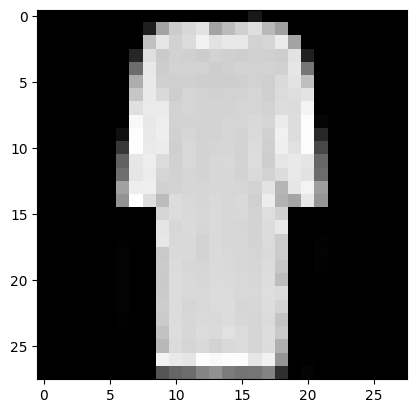

Label 3


In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = "gray")
plt.show()
print(f"Label {label}")

#3.TRANSFORM

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y : torch.zeros(10, dtype = torch.float).scatter_(0, torch.tensor(y), value = 1))
)

#4.CONSTRUCTING NEURALNETWORK MODEL

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
X = torch.rand(1, 28, 28, device = device)
logits = model(X)
pred_probab = nn.Softmax(dim = 1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Prrdicted class: {y_pred}")

Prrdicted class: tensor([1], device='cuda:0')


In [ ]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [ ]:
layer1 = nn.Linear(in_features = 28 * 28, out_features = 20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0127, -0.4101,  0.3318, -0.6937,  0.4893, -0.3113, -0.5998, -0.2737,
          0.5469,  0.2282, -0.2907,  0.1014, -0.3073,  0.0083, -0.5063, -0.0418,
          0.5995,  0.3429,  0.3367, -0.3960],
        [ 0.2784, -0.0709,  0.1534, -0.8657,  0.7141,  0.0109, -0.7289, -0.2827,
          0.6848,  0.0196, -0.1719,  0.4814, -0.3984, -0.2699, -0.2671, -0.1517,
          0.1013,  0.0885,  0.2579, -0.2672],
        [ 0.3734,  0.1985,  0.3687, -1.0670,  0.3601, -0.6141, -0.7258, -0.5192,
          0.4913,  0.1491, -0.4214,  0.2595, -0.2545, -0.1559, -0.1629, -0.0928,
          0.2845,  0.7500,  0.2874, -0.0784]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0127, 0.0000, 0.3318, 0.0000, 0.4893, 0.0000, 0.0000, 0.0000, 0.5469,
         0.2282, 0.0000, 0.1014, 0.0000, 0.0083, 0.0000, 0.0000, 0.5995, 0.3429,
         0.3367, 0.0000],
        [0.2784, 0.0000, 0.1534, 0.0000, 0.7141, 0.0109, 0.0000, 0.0000, 0.6848,
         0.0196, 0.0000, 0.4814, 0.0000, 0.0000, 0.00

In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

In [ ]:
softmax = nn.Softmax(dim = 1)
pred_probab = softmax(logits)

In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.name_parameters():
  print(f"Layer: {name} \\ Size: {param.size()} \\ Values : {param[:2]}\n")

#5.AUTOGRAD

In [ ]:
import torch

x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad = True)
b = torch.randn(3, requires_grad = True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7d76503cceb0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7d77003c7730>


In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0664, 0.2463, 0.2312],
        [0.0664, 0.2463, 0.2312],
        [0.0664, 0.2463, 0.2312],
        [0.0664, 0.2463, 0.2312],
        [0.0664, 0.2463, 0.2312]])
tensor([0.0664, 0.2463, 0.2312])


In [ ]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
  z = torch.matmul(x, w) + b
print(z.requires_grad)

True
False


In [ ]:
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


In [ ]:
inp = torch.eye(4, 5, requires_grad = True)
out = (inp + 1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph = True)
print(f"First call\n {inp.grad}")
out.backward(torch.ones_like(out), retain_graph = True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph = True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


#6.OPTIMIZATION

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size = 64)
test_dataloader = DataLoader(test_data, batch_size = 64)

class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits
model = NeuralNetwork()

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    pred = model(X)
    loss = loss_fn(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0 ,0
  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epochs = 10
for t in range(epochs):
  print(f"Epoch {t+1}\n------------------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
------------------------------
loss: 2.299985 [   64\60000]
loss: 2.288782 [ 6464\60000]
loss: 2.274198 [12864\60000]
loss: 2.274862 [19264\60000]
loss: 2.246651 [25664\60000]
loss: 2.226116 [32064\60000]
loss: 2.232375 [38464\60000]
loss: 2.200623 [44864\60000]
loss: 2.200150 [51264\60000]
loss: 2.169868 [57664\60000]
Test Error: 
 Accuracy: 44.8%, Avg loss: 2.166479

Epoch 2
------------------------------
loss: 2.173971 [   64\60000]
loss: 2.163661 [ 6464\60000]
loss: 2.111427 [12864\60000]
loss: 2.136584 [19264\60000]
loss: 2.080512 [25664\60000]
loss: 2.021523 [32064\60000]
loss: 2.058764 [38464\60000]
loss: 1.979984 [44864\60000]
loss: 1.990172 [51264\60000]
loss: 1.928624 [57664\60000]
Test Error: 
 Accuracy: 56.4%, Avg loss: 1.922377

Epoch 3
------------------------------
loss: 1.952012 [   64\60000]
loss: 1.920863 [ 6464\60000]
loss: 1.812357 [12864\60000]
loss: 1.859686 [19264\60000]
loss: 1.745273 [25664\60000]
loss: 1.691726 [32064\60000]
loss: 1.720885 [38464\60000

#7.MODEL SAVING & LOADING

In [ ]:
import torch
import torchvision.models as models

In [ ]:
model = models.vgg16(weights = 'IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 115MB/s]


In [ ]:
model = models.vgg16()
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
torch.save(model, 'model.pth')

In [ ]:
model = torch.load('model.pth')

#8.Model made by Jake

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import  Dataset

I chose CIFAR100 dataset because it sounds funny in Korean.

In [ ]:
training_data = datasets.CIFAR100(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.CIFAR100(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
batch_size = 32 #how much? I set as 100 because there are 50000 training images and 10000 test images

train_dataloader = DataLoader(training_data, batch_size = batch_size, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for X, y in test_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break
for X, y in train_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

Shape of X [N, C, H, W]: torch.Size([32, 3, 32, 32])
Shape of y: torch.Size([32]) torch.int64
Shape of X [N, C, H, W]: torch.Size([32, 3, 32, 32])
Shape of y: torch.Size([32]) torch.int64


In [ ]:
for X, y in train_dataloader:
  #print(f"train X: {X}")
  print(f"train label: {y}")
  break;
for Z, k in test_dataloader:
  #print(f"test X: {Z}")
  print(f"test label: {k}")
  break;


train label: tensor([64, 96,  6, 53, 67, 51, 20, 41, 50, 97, 28, 96,  3, 40, 13, 82, 49, 21,
        15, 83, 82, 65, 29, 81, 40, 77, 56, 67, 70, 82, 42, 62])
test label: tensor([63,  9, 42, 31, 48, 58,  4, 17, 52, 32, 63, 15, 15, 82, 36, 56, 49, 54,
        77, 95, 18, 61, 86, 10, 51, 83, 80, 26, 78, 16, 95, 43])


In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.tanh_stack = nn.Sequential(
        nn.Linear(3072, 3072),
        nn.Tanh(),
        nn.Linear(3072, 3072),
        nn.Tanh(),
        nn.Linear(3072, 100)
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.tanh_stack(x)
    return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (tanh_stack): Sequential(
    (0): Linear(in_features=3072, out_features=3072, bias=True)
    (1): Tanh()
    (2): Linear(in_features=3072, out_features=3072, bias=True)
    (3): Tanh()
    (4): Linear(in_features=3072, out_features=100, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.00003)

In [ ]:
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)
    pred = model(X)
    print(pred.argmax(1))

tensor([25, 25, 25, 25, 25, 25, 25, 37, 43, 25, 25, 25,  0, 25, 25, 25, 43, 25,
        25, 37, 53, 25, 11, 25, 25, 29, 25, 25, 25, 25, 25, 25],
       device='cuda:0')
tensor([25, 25, 25, 25, 25, 43, 25,  0, 25, 22, 25, 25, 25,  0, 25, 25,  0, 25,
        25, 25, 25, 25, 25, 43, 25, 37, 25, 25, 25, 25, 22, 22],
       device='cuda:0')
tensor([79, 25, 25, 37, 37, 22, 25, 25, 37, 43, 25, 25, 25, 25, 25,  4, 20, 25,
        22, 25, 25, 25, 22, 25, 25, 75, 37, 37, 37, 25, 75,  0],
       device='cuda:0')
tensor([25, 25, 11,  4, 25, 37, 49, 25, 89, 25, 25, 25, 37, 25, 25,  0, 29, 25,
        43, 37, 25, 25, 25, 25, 37, 22, 75, 25, 25, 25,  0, 25],
       device='cuda:0')
tensor([25, 43, 25, 25, 89, 95, 25, 25, 25, 25, 25, 43, 25, 25, 25, 37, 37, 22,
        25, 37, 25, 25,  0, 25, 25, 43, 25, 22, 25, 37, 25, 37],
       device='cuda:0')
tensor([25, 25, 43, 25, 25, 37, 25, 25, 25, 22, 25, 25, 37, 25, 25, 89, 25, 25,
        89, 25, 25, 25, 22, 25, 25, 25, 25, 22, 25, 25, 25, 25],
       dev

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    pred = model(X)
    loss = loss_fn(pred, y)
    optimizer.step()
    optimizer.zero_grad()
    loss.backward()
    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}|{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
  print(f"Epoch {t + 1}\n----------------------------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
----------------------------------
loss: 4.570265 [   32|50000]
loss: 4.618879 [ 3232|50000]
loss: 4.602179 [ 6432|50000]
loss: 4.603357 [ 9632|50000]
loss: 4.625878 [12832|50000]
loss: 4.625213 [16032|50000]
loss: 4.607869 [19232|50000]
loss: 4.602620 [22432|50000]
loss: 4.578335 [25632|50000]
loss: 4.577531 [28832|50000]
loss: 4.605626 [32032|50000]
loss: 4.619036 [35232|50000]
loss: 4.598710 [38432|50000]
loss: 4.657896 [41632|50000]
loss: 4.614313 [44832|50000]
loss: 4.617165 [48032|50000]
Test Error: 
 Accuracy: 1.0%, Avg loss: 4.609720 

Epoch 2
----------------------------------
loss: 4.622763 [   32|50000]
loss: 4.614435 [ 3232|50000]
loss: 4.599525 [ 6432|50000]
loss: 4.618576 [ 9632|50000]
loss: 4.584785 [12832|50000]
loss: 4.592534 [16032|50000]
loss: 4.635590 [19232|50000]
loss: 4.614925 [22432|50000]
loss: 4.598194 [25632|50000]
loss: 4.621317 [28832|50000]
loss: 4.582292 [32032|50000]
loss: 4.612466 [35232|50000]
loss: 4.626333 [38432|50000]
loss: 4.621167 [41632|

In [ ]:
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (tanh_stack): Sequential(
    (0): Linear(in_features=3072, out_features=3072, bias=True)
    (1): Tanh()
    (2): Linear(in_features=3072, out_features=3072, bias=True)
    (3): Tanh()
    (4): Linear(in_features=3072, out_features=3072, bias=True)
    (5): Tanh()
    (6): Linear(in_features=3072, out_features=3072, bias=True)
    (7): Tanh()
    (8): Linear(in_features=3072, out_features=100, bias=True)
  )
)